In [49]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
data = pd.read_csv("4222_ig_captions_new.csv", lineterminator='\n')
data_without_emojis = data.drop(['Unnamed: 0','Unnamed: 0.1','index', 'username', 'emoji'], axis=1)
data_without_emojis[:200]
emojis = pd.read_csv("insta_emojis.csv")
emojis = emojis.drop(['Unnamed: 0','is_fake'], axis = 1)
data_for_eda = pd.concat([data_without_emojis, emojis], join= 'inner')
data_without_emojis['emojis'] = emojis['emoji']
data_without_emojis.to_csv("data_for_text_eda.csv")
data_without_emojis['mentions_count'] = data_without_emojis['mentions'].apply(lambda x: len(ast.literal_eval(x)))
data_without_emojis['hashtags_count'] = data_without_emojis['hashtags'].apply(lambda x: len(ast.literal_eval(x)))
data_without_emojis['url_count'] = data_without_emojis['url'].apply(lambda x: len(ast.literal_eval(x)))
data_without_emojis['emoji_count'] = data_without_emojis['emojis'].apply(lambda x: len(ast.literal_eval(x)))
human_captions = data_without_emojis[data_without_emojis['is_fake']== 0]
bot_captions = data_without_emojis[data_without_emojis['is_fake']== 1]

In [72]:
data_without_emojis.head()

,captions,is_fake,mentions,hashtags,url,clean_captions,incorrect_spell_count,incorrect_spell_words,no_of_grammar_errors,%_of_improper_grammar,emojis,mentions_count,hashtags_count,url_count,emoji_count
0,Finally filming with @outcastssg !! Faster say...,0,"['outcastssg', 'outcastssg']",[],[],Finally filming with Faster say who do yall th...,5,"['filming', 'Faster', 'say,', ""ya'll"", 'guys']",5,0.113636,{'👆🏻': 'backhand index pointing up: light skin...,2,0,0,2
1,"Totally did not push back a post, just because...",0,[],[],[],Totally did not push back a post just because ...,2,"['post,', 'biooo']",2,0.068966,"{'😍': 'smiling face with heart-eyes', '👀': 'ey...",0,0,0,2
2,Tag a friend who always needs to break the yol...,0,[],[],[],a friend who always needs to break the yolk on...,2,"['yolk', 'This']",2,0.074074,"{'😖': 'confounded face', '🍳': 'cooking'}",0,0,0,2
3,Rate the transformation of this shophouse outt...,0,['hanniwongs'],[],[],the transformation of this shophouse outta s...,0,[],6,0.166667,"{'⭐': 'star', '💖': 'sparkling heart'}",1,0,0,2
4,"for the first timer ever in @getlostsg , one o...",0,['getlostsg'],[],[],for the first timer ever in one of the crew p...,3,"['timer', 'meal!!', 'vlog']",4,0.142857,"{'🥘': 'shallow pan of food', '🧐': 'face with m...",1,0,0,2


Grammar Errors

<AxesSubplot:xlabel='is_fake', ylabel='no_of_grammar_errors'>

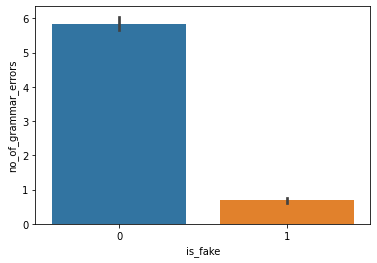

In [75]:
sns.barplot(data=data_without_emojis, x="is_fake", y="no_of_grammar_errors")

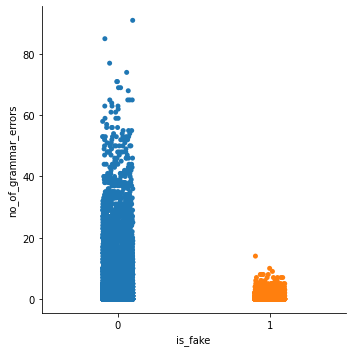

In [76]:
sns.catplot(x='is_fake', y = 'no_of_grammar_errors', data = data_without_emojis) 

Spelling

<AxesSubplot:xlabel='is_fake', ylabel='incorrect_spell_count'>

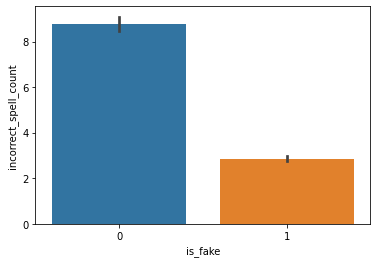

In [73]:
sns.barplot(data=data_without_emojis, x="is_fake", y="incorrect_spell_count")

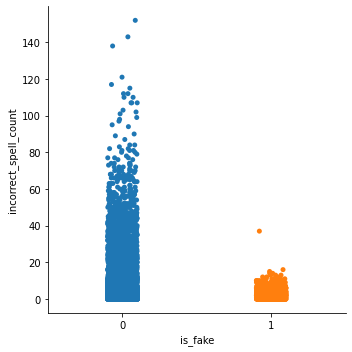

In [74]:
sns.catplot(x='is_fake', y = 'incorrect_spell_count', data = data_without_emojis) 

Mentions

<AxesSubplot:xlabel='is_fake', ylabel='mentions_count'>

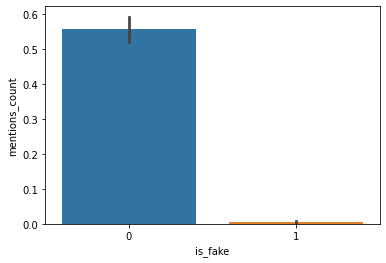

In [61]:
# Mentions
sns.barplot(data=data_without_emojis, x="is_fake", y="mentions_count")


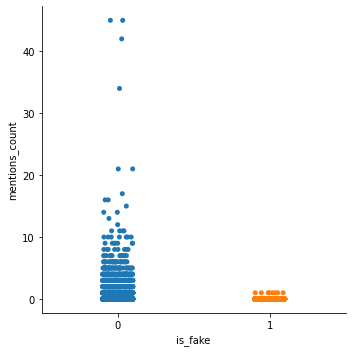

In [68]:
sns.catplot(x='is_fake', y = 'mentions_count', data = data_without_emojis) 

Hashtags

<AxesSubplot:xlabel='is_fake', ylabel='hashtags_count'>

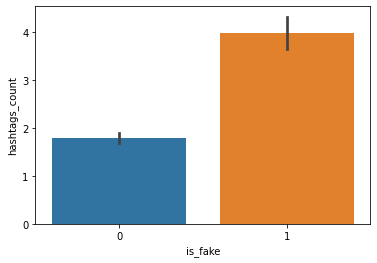

In [62]:
sns.barplot(data=data_without_emojis, x="is_fake", y="hashtags_count")

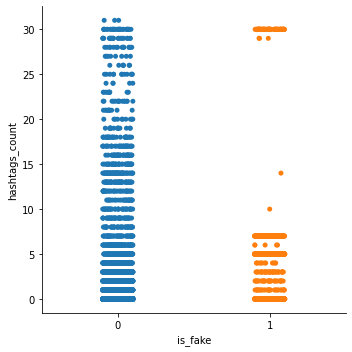

In [65]:
sns.catplot(x='is_fake', y = 'mentions_count', data = data_without_emojis) 

URLs

<AxesSubplot:xlabel='is_fake', ylabel='url_count'>

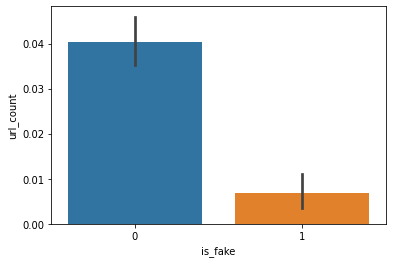

In [63]:
sns.barplot(data=data_without_emojis, x="is_fake", y="url_count")

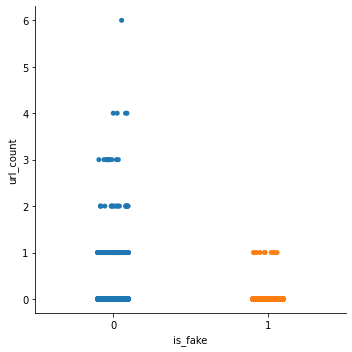

In [69]:
sns.catplot(x='is_fake', y = 'url_count', data = data_without_emojis) 

Emojis

<AxesSubplot:xlabel='is_fake', ylabel='emoji_count'>

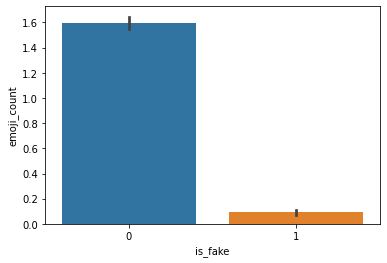

In [64]:
sns.barplot(data=data_without_emojis, x="is_fake", y="emoji_count")

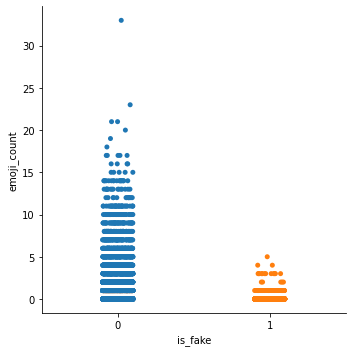

In [70]:
sns.catplot(x='is_fake', y = 'emoji_count', data = data_without_emojis) 

<AxesSubplot:>

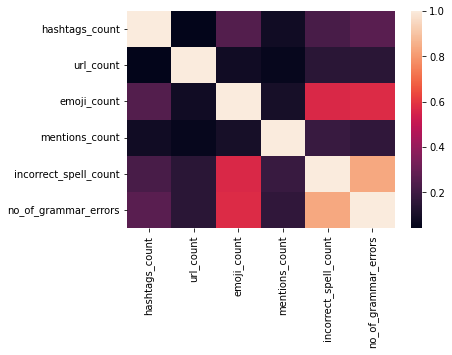

In [80]:
relevant_values_human = human_captions[['hashtags_count','url_count','emoji_count','mentions_count','incorrect_spell_count','no_of_grammar_errors']]
sns.heatmap(relevant_values_human.corr())

<AxesSubplot:>

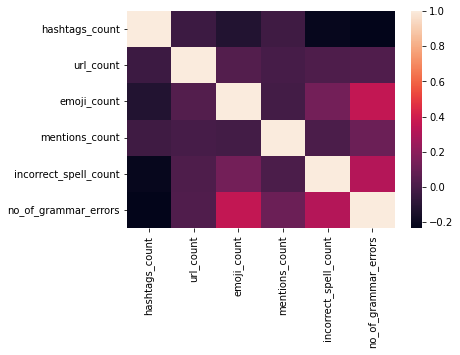

In [81]:
relevant_values_bot = bot_captions[['hashtags_count','url_count','emoji_count','mentions_count','incorrect_spell_count','no_of_grammar_errors']]
sns.heatmap(relevant_values_bot.corr())

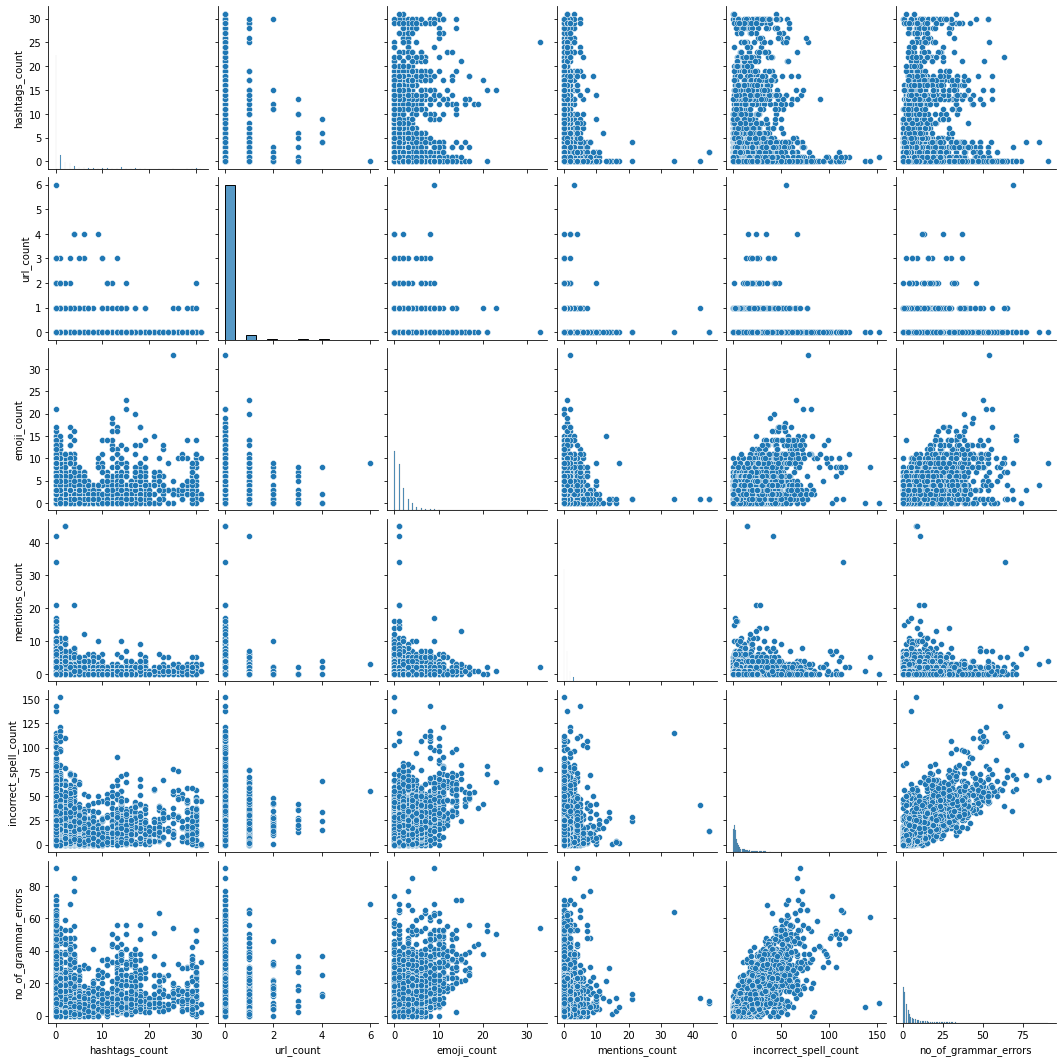

In [82]:
sns.pairplot(relevant_values_human) 

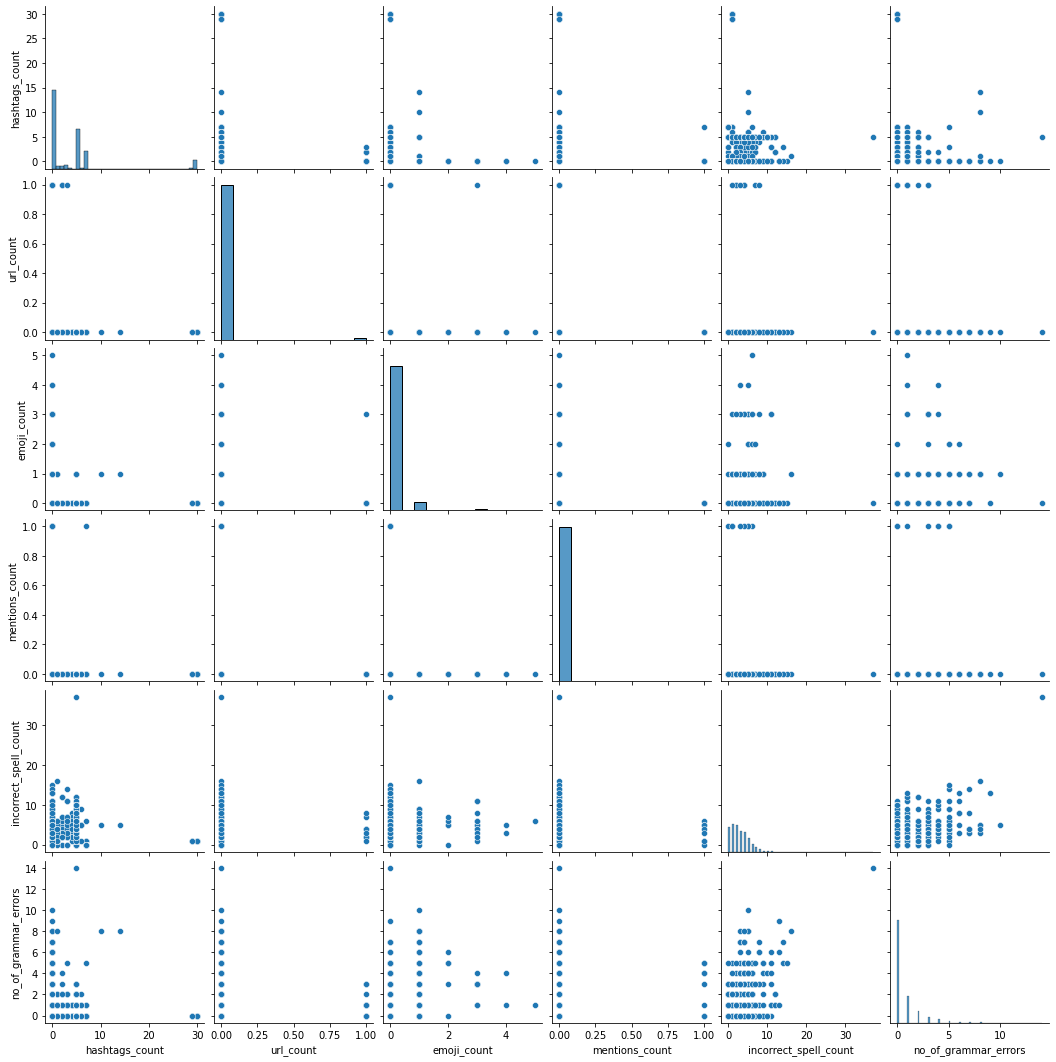

In [83]:
sns.pairplot(relevant_values_bot) 